In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras.api


In [ ]:
aapl = yf.Ticker("AAPL")

# get all stock info
aapl.info

# get historical market data
hist = aapl.history(period="10y")

In [ ]:
hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-29 00:00:00-04:00,21.898011,22.295350,21.893571,22.222097,199065200,0.0,0.0
2014-09-30 00:00:00-04:00,22.377486,22.539530,22.315333,22.364168,221056400,0.0,0.0
2014-10-01 00:00:00-04:00,22.328646,22.350845,21.909110,22.015659,205965200,0.0,0.0
2014-10-02 00:00:00-04:00,22.035635,22.246514,21.762605,22.175482,191031200,0.0,0.0
2014-10-03 00:00:00-04:00,22.073375,22.244296,21.984584,22.113331,173878400,0.0,0.0


In [ ]:
hist = hist[['Close']]

In [ ]:
hist.head()

,Close
Date,
2014-09-29 00:00:00-04:00,22.222097
2014-09-30 00:00:00-04:00,22.364168
2014-10-01 00:00:00-04:00,22.015659
2014-10-02 00:00:00-04:00,22.175482
2014-10-03 00:00:00-04:00,22.113331


<Axes: xlabel='Date'>

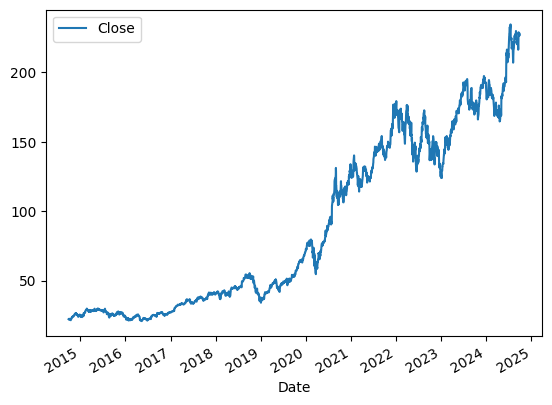

In [ ]:
hist.plot()

In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.api.models import Sequential
from keras.api.layers import LSTM, Dense,Input,Dropout


In [ ]:
hist['lag_diff_nominal'] = hist['Close'].diff(-1)

In [ ]:
# Create a new column 'Classification' based on 'lag_diff_nominal'
hist['Classification'] = np.where(hist['lag_diff_nominal'] > 0, 1, 0)

# Remove the first row since 'lag_diff_nominal' is null there
hist = hist.dropna(subset=['lag_diff_nominal'])

hist.head()

,Close,lag_diff_nominal,Classification
Date,,,
2014-09-29 00:00:00-04:00,22.222097,-0.142071,0
2014-09-30 00:00:00-04:00,22.364168,0.348509,1
2014-10-01 00:00:00-04:00,22.015659,-0.159822,0
2014-10-02 00:00:00-04:00,22.175482,0.062151,1
2014-10-03 00:00:00-04:00,22.113331,0.000000,0


In [ ]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-09-29 00:00:00-04:00 to 2024-09-26 00:00:00-04:00
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             2516 non-null   float64
 1   lag_diff_nominal  2516 non-null   float64
 2   Classification    2516 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 78.6 KB


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(hist['Close'].values.reshape(-1,1), test_size=0.25, shuffle=False)

In [ ]:
hist.isna().sum()

,0
Close,0
lag_diff_nominal,0
Classification,0


In [ ]:
test_data.shape

(629, 1)

In [ ]:
train_data.shape

(1887, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)


In [ ]:
scaled_train_data.shape

(1887, 1)

In [ ]:
sequence_length=60
X_train =[]
y_train =[]
for i in range(sequence_length,len(scaled_train_data)):
    X_train.append(scaled_train_data[i-sequence_length:i,0])
    y_train.append(scaled_train_data[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train[0]

array([[0.00947353],
       [0.01036957],
       [0.00817152],
       [0.00917952],
       [0.00878754],
       [0.00878754],
       [0.00756951],
       [0.01043956],
       [0.01074751],
       [0.01034156],
       [0.00905353],
       [0.00756951],
       [0.00587551],
       [0.00408349],
       [0.0060575 ],
       [0.00898354],
       [0.01277758],
       [0.01350555],
       [0.01608159],
       [0.01662761],
       [0.01647359],
       [0.01875561],
       [0.01959562],
       [0.01909162],
       [0.02051966],
       [0.02247967],
       [0.02135964],
       [0.02172362],
       [0.02215953],
       [0.02259542],
       [0.02234234],
       [0.02356562],
       [0.02574504],
       [0.02795256],
       [0.02986486],
       [0.02959767],
       [0.03167873],
       [0.03055385],
       [0.03285983],
       [0.03308479],
       [0.03612191],
       [0.03467368],
       [0.03664213],
       [0.03654374],
       [0.03111627],
       [0.0304976 ],
       [0.0323255 ],
       [0.031

In [ ]:
y_train

array([0.02755887, 0.02681367, 0.02959767, ..., 0.92804355, 0.95205306,
       0.956096  ])

In [ ]:
X_train[0].shape

(60,)

In [ ]:
X_train.shape, y_train.shape

((1827, 60), (1827,))

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
scaled_test_data = scaler.transform(test_data)

In [ ]:
X_test = []
y_test = []
for i in range(sequence_length, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-sequence_length:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1827, 60, 1), (1827,), (569, 60, 1), (569,))

In [ ]:
model = Sequential()

from keras.layers import Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
epochs = 30
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - loss: 0.0243
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 0.0021
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0018
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0019
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0018
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0015
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0017
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0019
Epoch 10/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0013
Epoch 11/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0015
Epoch 12/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0013
Epoch 13/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0015
Epoch 14/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0015
Epoch 15/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0012
Ep

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(actual_values, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 6.86


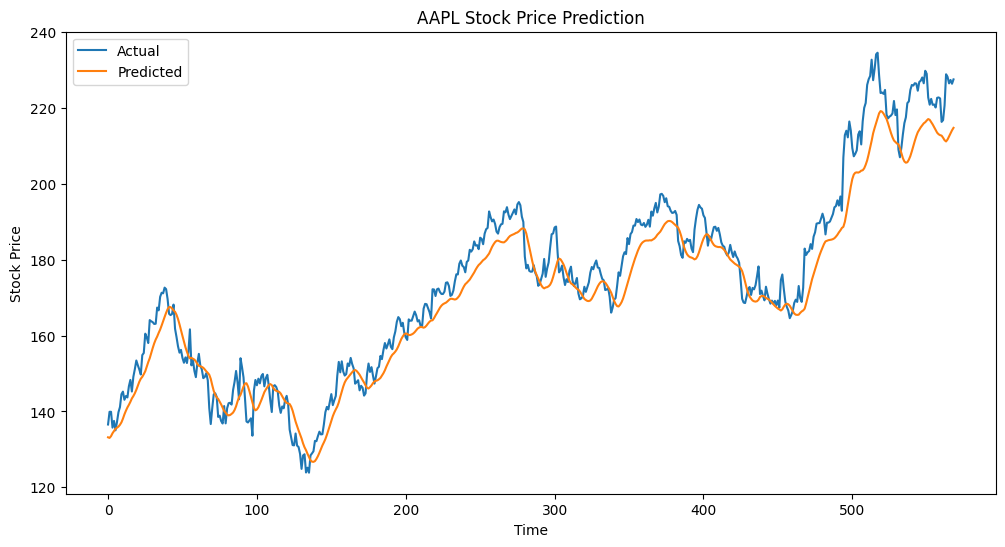

In [ ]:
# prompt: plot predicted against actual

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
train_data_differences, test_data_differences = train_test_split(hist['lag_diff_nominal'].values.reshape(-1,1), test_size=0.25, shuffle=False)

In [ ]:
scaled_train_data_differences = scaler.fit_transform(train_data_differences)

In [ ]:
X_train_differences =[]
y_train_differences =[]
for i in range(sequence_length,len(scaled_train_data_differences)):
    X_train_differences.append(scaled_train_data_differences[i-sequence_length:i,0])
    y_train_differences.append(scaled_train_data_differences[i,0])
X_train_differences = np.array(X_train_differences)
y_train_differences = np.array(y_train_differences)

In [ ]:
X_train_differences = np.reshape(X_train_differences, (X_train_differences.shape[0], X_train_differences.shape[1], 1))

In [ ]:
scaled_test_data_differences = scaler.transform(test_data_differences)

In [ ]:
X_test_differences = []
y_test_differences = []
for i in range(sequence_length, len(scaled_test_data_differences)):
  X_test_differences.append(scaled_test_data_differences[i-sequence_length:i, 0])
  y_test_differences.append(scaled_test_data_differences[i, 0])
X_test_differences = np.array(X_test_differences)
y_test_differences = np.array(y_test_differences)

In [ ]:
X_test_differences = np.reshape(X_test, (X_test_differences.shape[0], X_test_differences.shape[1], 1))

In [ ]:
model.fit(X_train_differences, y_train_differences, epochs=epochs, batch_size=batch_size)

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0064
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0060
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0063
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0054
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0052
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0051
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0055
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0055
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0062
Epoch 10/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0055
Epoch 11/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0055
Epoch 12/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0059
Epoch 13/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0054
Epoch 14/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0051
Epoch 15/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0064
Epoc

In [ ]:
predictions_differences = model.predict(X_test_differences)
predictions_differences = scaler.inverse_transform(predictions_differences)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
actual_values_differences = scaler.inverse_transform(y_test_differences.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
rmse_differences = math.sqrt(mean_squared_error(actual_values_differences, predictions_differences))
print(f'Root Mean Squared Error (RMSE): {rmse_differences:.2f}')

Root Mean Squared Error (RMSE): 2.85


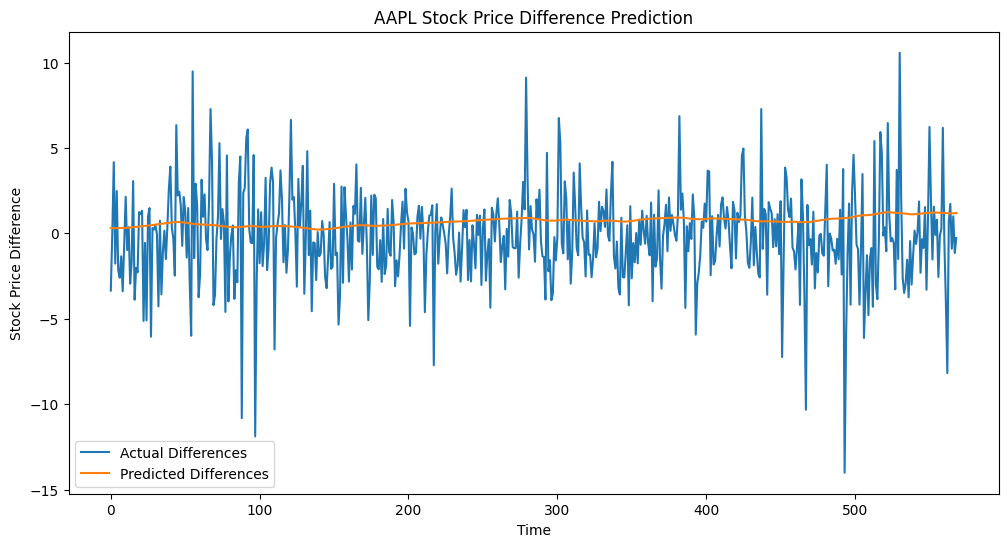

In [ ]:
# prompt: plot predictions_differences against the actual_value_differences

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(actual_values_differences, label='Actual Differences')
plt.plot(predictions_differences, label='Predicted Differences')
plt.title('AAPL Stock Price Difference Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price Difference')
plt.legend()
plt.show()
